In [3]:
%run _bootstrap.py
from src.paths import DATA_ROOT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the cleaned permits parquet file
permits_path = DATA_ROOT / "final_datasets" / "condo_permits_cleaned.parquet"
permits = pd.read_parquet(permits_path)

print(f"Loaded {len(permits):,} permits")

# Handle mixed types in FILE_DATE column
permits['FILE_DATE'] = pd.to_datetime(permits['FILE_DATE'], errors='coerce')
valid_dates = permits['FILE_DATE'].dropna()
print(f"Date range: {valid_dates.min()} to {valid_dates.max()}")
print(f"Structural permits: {permits['is_structural'].sum():,}")

# Extract year from FILE_DATE
permits['year'] = permits['FILE_DATE'].dt.year

# Filter for structural permits only
structural = permits[permits['is_structural']].copy()

print(f"\nStructural permits: {len(structural):,}")
print(f"Year range: {structural['year'].min()} to {structural['year'].max()}")


Loaded 816,900 permits
Date range: 1955-01-01 00:00:00 to 2025-10-14 00:00:00
Structural permits: 320,594

Structural permits: 320,594
Year range: 1980.0 to 2025.0


In [5]:
# Create time series data for structural permits by year
structural_by_year = structural.groupby('year').size().reset_index(name='count')

# Separate Miami-Dade/Broward from other counties
miami_broward_counties = ['Miami-Dade County', 'Broward County']
structural['is_miami_broward'] = structural['COUNTY'].isin(miami_broward_counties)

# Time series by region
structural_mb = structural[structural['is_miami_broward']].groupby('year').size().reset_index(name='count')
structural_other = structural[~structural['is_miami_broward']].groupby('year').size().reset_index(name='count')

print("Structural permits by region:")
print(f"Miami-Dade/Broward: {structural_mb['count'].sum():,}")
print(f"Other counties: {structural_other['count'].sum():,}")
print(f"Total: {len(structural):,}")


Structural permits by region:
Miami-Dade/Broward: 95,180
Other counties: 216,746
Total: 320,594


✓ Saved plot to: C:\Users\ngodin\Dropbox\RESEARCH\active_projects\florida_condo\final_code\20_permitting_analysis\output\structural_permits_timeseries.png


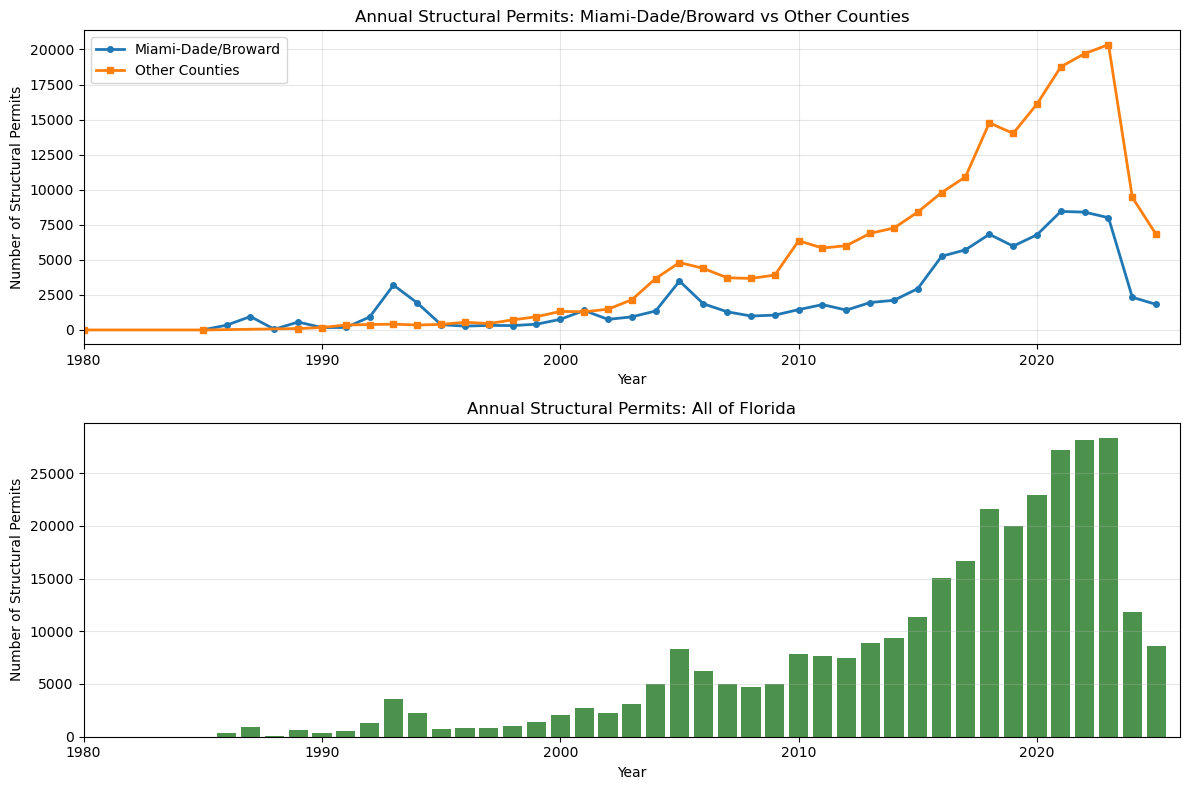

In [6]:
# Create two time series plots (starting from 1980)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Filter data to 1980 onwards
structural_mb_1980 = structural_mb[structural_mb['year'] >= 1980]
structural_other_1980 = structural_other[structural_other['year'] >= 1980]
structural_by_year_1980 = structural_by_year[structural_by_year['year'] >= 1980]

# Plot 1: Miami-Dade/Broward vs Other Counties
ax1 = axes[0]
ax1.plot(structural_mb_1980['year'], structural_mb_1980['count'], marker='o', label='Miami-Dade/Broward', linewidth=2, markersize=4)
ax1.plot(structural_other_1980['year'], structural_other_1980['count'], marker='s', label='Other Counties', linewidth=2, markersize=4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Structural Permits')
ax1.set_title('Annual Structural Permits: Miami-Dade/Broward vs Other Counties')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1980, structural_by_year_1980['year'].max() + 1)

# Plot 2: All of Florida
ax2 = axes[1]
ax2.bar(structural_by_year_1980['year'], structural_by_year_1980['count'], color='darkgreen', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Structural Permits')
ax2.set_title('Annual Structural Permits: All of Florida')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(1980, structural_by_year_1980['year'].max() + 1)

plt.tight_layout()

# Create output directory if it doesn't exist
output_dir = DATA_ROOT / "final_code" / "20_permitting_analysis" / "output"
output_dir.mkdir(parents=True, exist_ok=True)

# Save figure

output_file = output_dir / "structural_permits_timeseries.png"

plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"✓ Saved plot to: {output_file}")
plt.show()

In [7]:
# Create time series data for ALL permits by year
all_permits_by_year = permits.groupby('year').size().reset_index(name='count')

# Separate Miami-Dade/Broward from other counties for all permits
permits['is_miami_broward'] = permits['COUNTY'].isin(miami_broward_counties)

# Time series by region for all permits
all_permits_mb = permits[permits['is_miami_broward']].groupby('year').size().reset_index(name='count')
all_permits_other = permits[~permits['is_miami_broward']].groupby('year').size().reset_index(name='count')

print("All permits by region:")
print(f"Miami-Dade/Broward: {all_permits_mb['count'].sum():,}")
print(f"Other counties: {all_permits_other['count'].sum():,}")
print(f"Total: {len(permits):,}")


All permits by region:
Miami-Dade/Broward: 232,738
Other counties: 553,504
Total: 816,900


✓ Saved plot to: C:\Users\ngodin\Dropbox\RESEARCH\active_projects\florida_condo\final_code\20_permitting_analysis\output\all_permits_timeseries.png


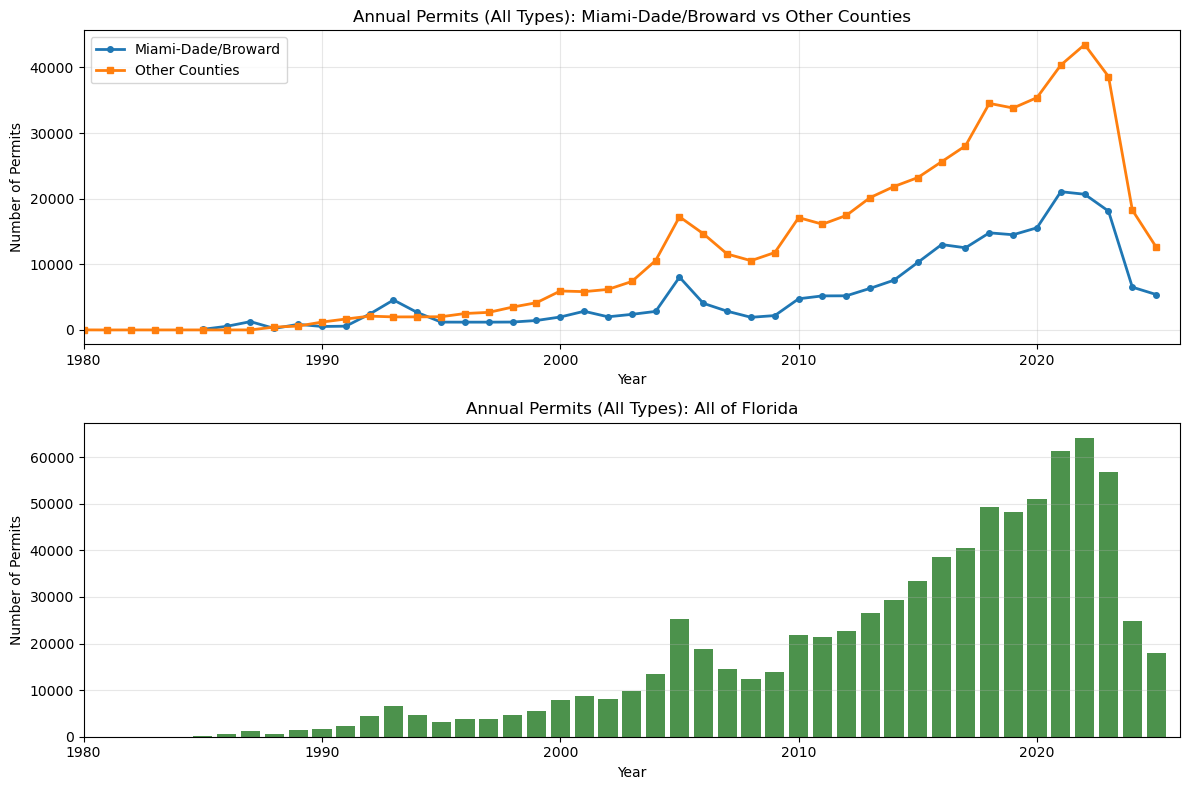

In [8]:
# Create two time series plots for ALL permits (starting from 1980)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Filter data to 1980 onwards
all_permits_mb_1980 = all_permits_mb[all_permits_mb['year'] >= 1980]
all_permits_other_1980 = all_permits_other[all_permits_other['year'] >= 1980]
all_permits_by_year_1980 = all_permits_by_year[all_permits_by_year['year'] >= 1980]

# Plot 1: Miami-Dade/Broward vs Other Counties
ax1 = axes[0]
ax1.plot(all_permits_mb_1980['year'], all_permits_mb_1980['count'], marker='o', label='Miami-Dade/Broward', linewidth=2, markersize=4)
ax1.plot(all_permits_other_1980['year'], all_permits_other_1980['count'], marker='s', label='Other Counties', linewidth=2, markersize=4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Permits')
ax1.set_title('Annual Permits (All Types): Miami-Dade/Broward vs Other Counties')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1980, all_permits_by_year_1980['year'].max() + 1)

# Plot 2: All of Florida
ax2 = axes[1]
ax2.bar(all_permits_by_year_1980['year'], all_permits_by_year_1980['count'], color='darkgreen', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Permits')
ax2.set_title('Annual Permits (All Types): All of Florida')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(1980, all_permits_by_year_1980['year'].max() + 1)

plt.tight_layout()

# Save figure to output directory

output_file_all = output_dir / "all_permits_timeseries.png"

plt.savefig(output_file_all, dpi=300, bbox_inches='tight')
print(f"✓ Saved plot to: {output_file_all}")
plt.show()

In [9]:
# ============================================================================
# SB 4-D Impact Analysis
# ============================================================================
# SB 4-D: Passed May 2022, Initial compliance deadline: Dec 31 2024, 
#         Extended deadline: Dec 31 2025

# Load condo association master dataset for merging
master_dataset_path = DATA_ROOT / "final_datasets" / "master_datasets" / "master_dataset_unit_crossection.parquet"
print(f"Loading master dataset...")

try:
    master_data = pd.read_parquet(master_dataset_path)
    print(f"Loaded {len(master_data):,} condo units from master dataset")
    print(f"Columns: {master_data.columns.tolist()}")
except FileNotFoundError:
    print(f"File not found: {master_dataset_path}")
    print("Checking for .dta format...")
    master_dataset_path_dta = master_dataset_path.with_suffix('.dta')
    master_data = pd.read_stata(master_dataset_path_dta)
    print(f"Loaded {len(master_data):,} units from Stata file")
    print(f"Columns: {master_data.columns.tolist()}")

# Inspect the association data
print(f"\nAssociation sample:")
print(master_data[['building_address_attom', 'assoc_name_final']].head(10))
print(f"\nNumber of unique associations: {master_data['assoc_name_final'].nunique():,}")


Loading master dataset...
File not found: C:\Users\ngodin\Dropbox\RESEARCH\active_projects\florida_condo\final_datasets\master_datasets\master_dataset_unit_crossection.parquet
Checking for .dta format...
Loaded 634,096 units from Stata file
Columns: ['assoc_name_final', 'building_address_attom', 'address_attom', 'mm_fips_county_name_attom', 'yr_blt_effect_attom_bldg', 'three_miles_coast_bldg', 'miles_to_coast_bldg', 'yr_blt_attom_bldg', 'num_stories_final_bldg', 'num_units_attom_bldg', 'treated_bldg', 'id_attom', 'nbr_baths_attom_unit', 'nbr_bedrms_attom_unit', 'sqft_attom_unit', 'x_coord_attom_unit', 'y_coord_attom_unit', 'zip5_attom', 'num_units_records_assoc', 'has_sb4d_disc_records_assoc', 'zip5_owner_attom', 'nonprimary_zip_attom_unit', 'nonprimary_state_attom_unit', 'corp_own_flag_attom_unit', 'total_annual_hoa_attom_unit', 'total_monthly_hoa_attom_unit', 'primary_hoa_mgmt_attom_assoc', 'add_primary_hoa_mgmt_attom_assoc', 'corp_mgmt_zip_attom_assoc', 'corp_mgmt_city_attom_assoc',

In [10]:
# Merge permits with condo association data
print("Merging permits with condo association data...")
print("Note: Filtering to treated_assoc==1 (3+ story buildings) and excluding Miami-Dade/Broward\n")

# Filter master data to treated condos (3+ stories) only
master_data_treated = master_data[master_data['treated_assoc'] == 1].copy()
print(f"Treated associations (3+ stories): {master_data_treated['assoc_name_final'].nunique():,}")

# Create a clean address key for merging
permits_for_merge = permits[['building_address_attom', 'FILE_DATE', 'year', 'is_structural', 'COUNTY', 'JURISDICTION', 'JOB_VALUE']].copy()

# Get unique associations per address from treated condos (in case of duplicates)
assoc_by_address = master_data_treated[['building_address_attom', 'assoc_name_final', 'treated_assoc']].drop_duplicates()

print(f"Unique addresses in permits: {permits_for_merge['building_address_attom'].nunique():,}")
print(f"Unique treated addresses in master data: {assoc_by_address['building_address_attom'].nunique():,}")

# Merge on building_address_attom
permits_with_assoc = permits_for_merge.merge(
    assoc_by_address,
    on='building_address_attom',
    how='left'
)

print(f"\nAfter merge:")
print(f"Total permits: {len(permits_with_assoc):,}")
print(f"Permits with association match (treated): {permits_with_assoc['assoc_name_final'].notna().sum():,}")
print(f"Permits in treated condo buildings: {(permits_with_assoc['assoc_name_final'].notna().sum() / len(permits_with_assoc) * 100):.1f}%")

# Filter to exclude Miami-Dade and Broward counties
excluded_counties = ['Miami-Dade County', 'Broward County']
permits_sb4d = permits_with_assoc[~permits_with_assoc['COUNTY'].isin(excluded_counties)].copy()

print(f"\nAfter excluding Miami-Dade and Broward counties:")
print(f"Total permits: {len(permits_sb4d):,}")
print(f"Permits with association match: {permits_sb4d['assoc_name_final'].notna().sum():,}")

# Create SB 4-D indicators
permits_sb4d['is_treated_condo'] = permits_sb4d['assoc_name_final'].notna()

permits_sb4d['file_date'] = pd.to_datetime(permits_sb4d['FILE_DATE'], errors='coerce')

# Define SB 4-D periods
permits_sb4d['sb4d_period'] = pd.cut(
    permits_sb4d['file_date'],
    bins=[
        pd.Timestamp('1950-01-01'),
        pd.Timestamp('2022-05-01'),     # Before passage
        pd.Timestamp('2024-12-31'),     # Passage to initial deadline
        pd.Timestamp('2025-12-31'),     # Initial deadline to extended deadline
        pd.Timestamp('2026-12-31')      # After extended deadline
    ],
    labels=['Pre-SB4D (before May 2022)', 
            'SB4D Passage (May 2022 - Dec 2024)', 
            'Compliance Period (Jan 2025 - Dec 2025)', 
            'Post-Extended (Jan 2026+)']
)

print(f"\nSB 4-D Period Distribution:")
print(permits_sb4d['sb4d_period'].value_counts().sort_index())

print(f"\nTreated Condo Permits by Period:")
treated_by_period = permits_sb4d[permits_sb4d['is_treated_condo']].groupby('sb4d_period').size()
print(treated_by_period)

print(f"\nSample of merged data:")
print(permits_sb4d[['building_address_attom', 'year', 'is_structural', 'is_treated_condo', 'COUNTY']].head(10))


Merging permits with condo association data...
Note: Filtering to treated_assoc==1 (3+ story buildings) and excluding Miami-Dade/Broward

Treated associations (3+ stories): 8,672
Unique addresses in permits: 91,043
Unique treated addresses in master data: 10,804

After merge:
Total permits: 947,475
Permits with association match (treated): 388,582
Permits in treated condo buildings: 41.0%

After excluding Miami-Dade and Broward counties:
Total permits: 613,223
Permits with association match: 179,518

SB 4-D Period Distribution:
sb4d_period
Pre-SB4D (before May 2022)                 492900
SB4D Passage (May 2022 - Dec 2024)          92279
Compliance Period (Jan 2025 - Dec 2025)     13785
Post-Extended (Jan 2026+)                       0
Name: count, dtype: int64

Treated Condo Permits by Period:
sb4d_period
Pre-SB4D (before May 2022)                 148773
SB4D Passage (May 2022 - Dec 2024)          25796
Compliance Period (Jan 2025 - Dec 2025)      3844
Post-Extended (Jan 2026+)       

C:\Users\ngodin\AppData\Local\Temp\ipykernel_23380\652371953.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treated_by_period = permits_sb4d[permits_sb4d['is_treated_condo']].groupby('sb4d_period').size()


In [11]:
# SB 4-D Impact Analysis Summary
print("="*80)
print("SB 4-D IMPACT ANALYSIS (3+ Story Condos, Outside Miami-Dade/Broward)")
print("="*80)

# Separate treatment and control groups
treated_permits = permits_sb4d[permits_sb4d['is_treated_condo']].copy()
control_permits = permits_sb4d[~permits_sb4d['is_treated_condo']].copy()

print(f"\nSample Composition:")
print(f"  Treated permits (3+ story condos): {len(treated_permits):,}")
print(f"  Control permits (other buildings): {len(control_permits):,}")
print(f"  Treatment rate: {(len(treated_permits) / len(permits_sb4d) * 100):.1f}%")

# Analyze trends by period
print(f"\n--- TREATED GROUP (3+ Story Condos) ---")
treated_by_period = treated_permits.groupby('sb4d_period').agg({
    'building_address_attom': 'count',
    'is_structural': 'sum'
}).rename(columns={'building_address_attom': 'Total Permits', 'is_structural': 'Structural Permits'})
treated_by_period['% Structural'] = (treated_by_period['Structural Permits'] / treated_by_period['Total Permits'] * 100).round(1)
print(treated_by_period)

print(f"\n--- CONTROL GROUP (Non-3+ Story) ---")
control_by_period = control_permits.groupby('sb4d_period').agg({
    'building_address_attom': 'count',
    'is_structural': 'sum'
}).rename(columns={'building_address_attom': 'Total Permits', 'is_structural': 'Structural Permits'})
control_by_period['% Structural'] = (control_by_period['Structural Permits'] / control_by_period['Total Permits'] * 100).round(1)
print(control_by_period)

# Annual trends
print(f"\n--- ANNUAL TRENDS (Treated vs Control) ---")
annual_comparison = pd.DataFrame({
    'Treated': treated_permits.groupby('year').size(),
    'Control': control_permits.groupby('year').size()
})
annual_comparison['Treated % of Total'] = (annual_comparison['Treated'] / (annual_comparison['Treated'] + annual_comparison['Control']) * 100).round(1)
print(annual_comparison[annual_comparison.index >= 2020])

# Counties with most SB 4-D affected permits
print(f"\n--- TOP COUNTIES WITH SB 4-D AFFECTED PERMITS ---")
treated_by_county = treated_permits['COUNTY'].value_counts().head(10)
print(treated_by_county)


SB 4-D IMPACT ANALYSIS (3+ Story Condos, Outside Miami-Dade/Broward)

Sample Composition:
  Treated permits (3+ story condos): 179,518
  Control permits (other buildings): 433,705
  Treatment rate: 29.3%

--- TREATED GROUP (3+ Story Condos) ---
                                         Total Permits  Structural Permits  \
sb4d_period                                                                  
Pre-SB4D (before May 2022)                      148773               52146   
SB4D Passage (May 2022 - Dec 2024)               25796               11721   
Compliance Period (Jan 2025 - Dec 2025)           3844                1683   
Post-Extended (Jan 2026+)                            0                   0   

                                         % Structural  
sb4d_period                                            
Pre-SB4D (before May 2022)                       35.1  
SB4D Passage (May 2022 - Dec 2024)               45.4  
Compliance Period (Jan 2025 - Dec 2025)          43.8  
Post-E

C:\Users\ngodin\AppData\Local\Temp\ipykernel_23380\1695824745.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treated_by_period = treated_permits.groupby('sb4d_period').agg({
C:\Users\ngodin\AppData\Local\Temp\ipykernel_23380\1695824745.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  control_by_period = control_permits.groupby('sb4d_period').agg({


COUNTY
Pinellas County        43444
Lee County             21357
Palm Beach County      17812
Sarasota County        15739
Volusia County         14381
Hillsborough County    14205
Indian River County    14146
Brevard County          6546
Escambia County         6093
Charlotte County        5623
Name: count, dtype: int64


✓ Saved SB 4-D analysis plot to: C:\Users\ngodin\Dropbox\RESEARCH\active_projects\florida_condo\final_code\20_permitting_analysis\output\sb4d_impact_analysis.png


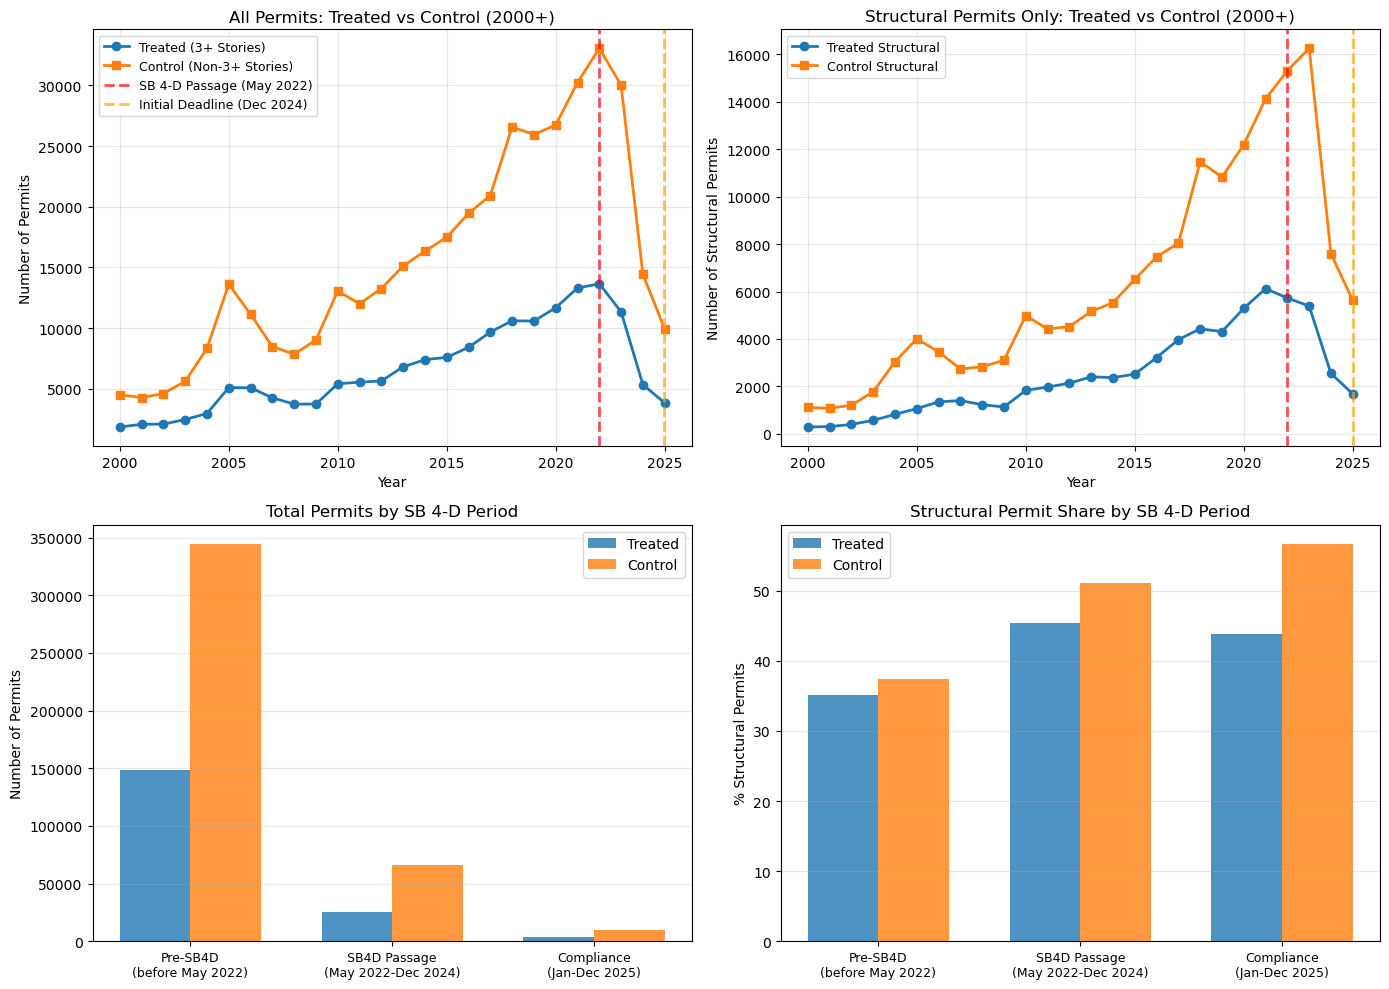

In [12]:
# Create SB 4-D impact visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Filter to years with data (2000 onwards)
treated_annual = treated_permits[treated_permits['year'] >= 2000].groupby('year').size()
control_annual = control_permits[control_permits['year'] >= 2000].groupby('year').size()
structural_treated = treated_permits[(treated_permits['year'] >= 2000) & (treated_permits['is_structural'])].groupby('year').size()
structural_control = control_permits[(control_permits['year'] >= 2000) & (control_permits['is_structural'])].groupby('year').size()

# Plot 1: Total permits by year
ax = axes[0, 0]
ax.plot(treated_annual.index, treated_annual.values, marker='o', label='Treated (3+ Stories)', linewidth=2, markersize=6)
ax.plot(control_annual.index, control_annual.values, marker='s', label='Control (Non-3+ Stories)', linewidth=2, markersize=6)
ax.axvline(x=2022, color='red', linestyle='--', linewidth=2, label='SB 4-D Passage (May 2022)', alpha=0.7)
ax.axvline(x=2024.99, color='orange', linestyle='--', linewidth=2, label='Initial Deadline (Dec 2024)', alpha=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Permits')
ax.set_title('All Permits: Treated vs Control (2000+)')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 2: Structural permits by year
ax = axes[0, 1]
ax.plot(structural_treated.index, structural_treated.values, marker='o', label='Treated Structural', linewidth=2, markersize=6)
ax.plot(structural_control.index, structural_control.values, marker='s', label='Control Structural', linewidth=2, markersize=6)
ax.axvline(x=2022, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(x=2024.99, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Structural Permits')
ax.set_title('Structural Permits Only: Treated vs Control (2000+)')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 3: Period comparison - Total permits
ax = axes[1, 0]
periods = ['Pre-SB4D\n(before May 2022)', 'SB4D Passage\n(May 2022-Dec 2024)', 'Compliance\n(Jan-Dec 2025)']
treated_counts = [
    len(treated_permits[treated_permits['sb4d_period'] == 'Pre-SB4D (before May 2022)']),
    len(treated_permits[treated_permits['sb4d_period'] == 'SB4D Passage (May 2022 - Dec 2024)']),
    len(treated_permits[treated_permits['sb4d_period'] == 'Compliance Period (Jan 2025 - Dec 2025)'])
]
control_counts = [
    len(control_permits[control_permits['sb4d_period'] == 'Pre-SB4D (before May 2022)']),
    len(control_permits[control_permits['sb4d_period'] == 'SB4D Passage (May 2022 - Dec 2024)']),
    len(control_permits[control_permits['sb4d_period'] == 'Compliance Period (Jan 2025 - Dec 2025)'])
]

x = np.arange(len(periods))
width = 0.35
ax.bar(x - width/2, treated_counts, width, label='Treated', alpha=0.8)
ax.bar(x + width/2, control_counts, width, label='Control', alpha=0.8)
ax.set_ylabel('Number of Permits')
ax.set_title('Total Permits by SB 4-D Period')
ax.set_xticks(x)
ax.set_xticklabels(periods, fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Plot 4: Structural permit percentage by period
ax = axes[1, 1]
treated_pct = []
control_pct = []
for period_label in ['Pre-SB4D (before May 2022)', 'SB4D Passage (May 2022 - Dec 2024)', 
                      'Compliance Period (Jan 2025 - Dec 2025)']:
    t = treated_permits[treated_permits['sb4d_period'] == period_label]
    c = control_permits[control_permits['sb4d_period'] == period_label]
    treated_pct.append((t['is_structural'].sum() / len(t) * 100) if len(t) > 0 else 0)
    control_pct.append((c['is_structural'].sum() / len(c) * 100) if len(c) > 0 else 0)

x = np.arange(len(periods))
ax.bar(x - width/2, treated_pct, width, label='Treated', alpha=0.8)
ax.bar(x + width/2, control_pct, width, label='Control', alpha=0.8)
ax.set_ylabel('% Structural Permits')
ax.set_title('Structural Permit Share by SB 4-D Period')
ax.set_xticks(x)
ax.set_xticklabels(periods, fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# Save figure
sb4d_plot_path = output_dir / "sb4d_impact_analysis.png"
plt.savefig(sb4d_plot_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved SB 4-D analysis plot to: {sb4d_plot_path}")
plt.show()


In [13]:
# Regression-based "Propensity to Permit" measure (Pre-SB4D, Structural Only)
# Controls for amenity covariates, property age, and year fixed effects

import statsmodels.api as sm
from statsmodels.formula.api import logit

# Get covariates from master data and merge with permits
covariates = ['gym_redfin_assoc', 'pool_redfin_assoc', 'spa_broad_redfin_assoc', 
              'tennis_redfin_assoc', 'golf_redfin_assoc', 'garage_redfin_assoc',
              'boat_redfin_assoc', 'elevator_redfin_assoc', 'view_redfin_assoc',
              'senior_community_redfin_assoc', 'yr_blt_attom_assoc']

# Filter master data to treated associations only
master_for_merge = master_data_treated[['assoc_name_final', 'building_address_attom'] + covariates].drop_duplicates(subset=['assoc_name_final'])

# Get pre-SB4D structural permits
pre_sb4d_structural = permits_sb4d[
    (permits_sb4d['sb4d_period'] == 'Pre-SB4D (before May 2022)') & 
    (permits_sb4d['is_structural'])
].copy()

# Exclude Miami-Dade and Broward counties
exclude_counties = ['Miami-Dade County', 'Broward County']
pre_sb4d_structural = pre_sb4d_structural[~pre_sb4d_structural['COUNTY'].isin(exclude_counties)].copy()

print(f"Pre-SB4D structural permits: {len(pre_sb4d_structural):,}")
print(f"Associations with permits: {pre_sb4d_structural['assoc_name_final'].nunique():,}\n")

# Create propensity measures over different year windows
year_windows = [5, 10, 20]
results_by_window = {}

for window_years in year_windows:
    print(f"\n{'='*80}")
    print(f"Computing Propensity to Permit: {window_years}-year pre-SB4D window")
    print(f"{'='*80}")
    
    # Set time window
    cutoff_year = 2022
    start_year = cutoff_year - window_years
    
    # Filter permits to this window
    window_permits = pre_sb4d_structural[pre_sb4d_structural['year'] >= start_year].copy()
    
    # Create association-year level dataset
    assoc_year_data = []
    all_assocs = window_permits['assoc_name_final'].unique()
    
    for assoc in all_assocs:
        assoc_data = master_for_merge[master_for_merge['assoc_name_final'] == assoc]
        
        if len(assoc_data) == 0:
            continue
        
        for year in range(start_year, cutoff_year + 1):
            year_permits = window_permits[
                (window_permits['assoc_name_final'] == assoc) & 
                (window_permits['year'] == year)
            ]
            
            record = assoc_data.iloc[0].to_dict()
            record['year'] = year
            record['permit_indicator'] = 1 if len(year_permits) > 0 else 0
            record['n_permits'] = len(year_permits)
            
            # Calculate property age at time of observation
            if pd.notna(record['yr_blt_attom_assoc']):
                record['property_age_years'] = year - record['yr_blt_attom_assoc']
            else:
                record['property_age_years'] = np.nan
            
            # Extract ZIP from building_address_attom (last field)
            addr_parts = str(record['building_address_attom']).split()
            record['zip_code'] = addr_parts[-1][:5] if len(addr_parts) > 0 else 'NA'
            
            assoc_year_data.append(record)
    
    regression_data = pd.DataFrame(assoc_year_data).dropna(subset=['property_age_years'])
    
    print(f"Association-year observations: {len(regression_data):,}")
    print(f"Associations with data: {regression_data['assoc_name_final'].nunique():,}")
    print(f"Overall permit rate: {regression_data['permit_indicator'].mean():.3f}")
    print(f"Permits observed: {regression_data['permit_indicator'].sum():.0f}\n")
    
    # Fit logit with covariates only (no FE for now to avoid singularity)
    covariate_list = [c for c in covariates if c != 'yr_blt_attom_assoc']
    formula = f"permit_indicator ~ {' + '.join(covariate_list)} + property_age_years + C(year)"
    
    # Fit model
    try:
        logit_model = logit(formula, data=regression_data).fit(disp=0)
        
        # Extract residuals and predictions
        regression_data['residual_propensity'] = logit_model.resid_pearson
        regression_data['predicted_propensity'] = logit_model.predict(regression_data)
        
        # Aggregate at association level: use mean residual propensity
        assoc_propensity = regression_data.groupby('assoc_name_final').agg({
            'residual_propensity': 'mean',
            'predicted_propensity': 'mean',
            'n_permits': 'sum',
            'permit_indicator': ['sum', 'count']
        }).round(4)
        
        assoc_propensity.columns = ['residual_propensity', 'predicted_propensity', 'n_permits_total', 
                                    'n_years_w_permits', 'n_years_total']
        assoc_propensity = assoc_propensity.sort_values('residual_propensity', ascending=False)
        
        print(f"Model fit successfully. R-squared: {logit_model.prsquared:.4f}")
        print(f"\nTop 20 associations by residual propensity (controlling for covariates):")
        print(assoc_propensity.head(20).to_string())
        
        results_by_window[window_years] = {
            'model': logit_model,
            'data': regression_data,
            'assoc_propensity': assoc_propensity
        }
        
    except Exception as e:
        print(f"Model fitting failed: {e}")

print(f"\n{'='*80}")
print("Completed propensity calculations for all windows")

Pre-SB4D structural permits: 180,898
Associations with permits: 1,853


Computing Propensity to Permit: 5-year pre-SB4D window
Association-year observations: 8,898
Associations with data: 1,483
Overall permit rate: 0.549
Permits observed: 4882

Model fit successfully. R-squared: 0.0450

Top 20 associations by residual propensity (controlling for covariates):
                                                                                 residual_propensity  predicted_propensity  n_permits_total  n_years_w_permits  n_years_total
assoc_name_final                                                                                                                                                             
100 PIERCE ST, CLEARWATER, FL 33756                                                           1.2926                0.3812               16                  6              6
GRAND CENTRAL AT KENNEDY RESIDENCES, A CONDO 33602                                            1.2359                0

In [14]:
# Summary of propensity results across windows

print("SUMMARY: Association-Level Propensity to Permit (Pre-SB4D)")
print("="*80)
print("Regression-based measure controlling for amenities and property age\n")

for window_years in year_windows:
    if window_years not in results_by_window:
        continue
        
    result = results_by_window[window_years]
    assoc_prop = result['assoc_propensity']
    
    print(f"\n{window_years}-Year Window (Pre-SB4D)")
    print("-" * 60)
    print(f"N associations: {len(assoc_prop):,}")
    print(f"Residual propensity range: [{assoc_prop['residual_propensity'].min():.4f}, {assoc_prop['residual_propensity'].max():.4f}]")
    print(f"Mean residual propensity: {assoc_prop['residual_propensity'].mean():.4f}")
    print(f"Median residual propensity: {assoc_prop['residual_propensity'].median():.4f}")
    print(f"Std dev: {assoc_prop['residual_propensity'].std():.4f}\n")
    
    print("Top 10 associations (highest propensity to permit):")
    top10 = assoc_prop.head(10)[['residual_propensity', 'predicted_propensity', 'n_permits_total', 'n_years_total']]
    print(top10.to_string())

# Create merged propensity dataframe across windows for easy export
propensity_summary = pd.DataFrame()

for window_years in year_windows:
    if window_years not in results_by_window:
        continue
    
    result = results_by_window[window_years]
    assoc_prop = result['assoc_propensity'].copy()
    assoc_prop = assoc_prop.rename(columns={'residual_propensity': f'propensity_{window_years}yr'})
    
    if len(propensity_summary) == 0:
        propensity_summary = assoc_prop[[f'propensity_{window_years}yr', 'n_permits_total']].copy()
    else:
        propensity_summary = propensity_summary.join(
            assoc_prop[[f'propensity_{window_years}yr']], 
            how='outer'
        )

propensity_summary = propensity_summary.sort_values('propensity_20yr', ascending=False, na_position='last')

print(f"\n{'='*80}")
print("\nTop 30 associations across all propensity measures:")
print(propensity_summary.head(30).to_string())

# Save to CSV
propensity_output_path = output_dir / "assoc_propensity_to_permit_structural_presb4d.csv"
propensity_summary.to_csv(propensity_output_path)
print(f"\n✓ Saved propensity measures to: {propensity_output_path}")


SUMMARY: Association-Level Propensity to Permit (Pre-SB4D)
Regression-based measure controlling for amenities and property age


5-Year Window (Pre-SB4D)
------------------------------------------------------------
N associations: 1,483
Residual propensity range: [-1.5330, 1.2926]
Mean residual propensity: -0.0013
Median residual propensity: -0.0555
Std dev: 0.6336

Top 10 associations (highest propensity to permit):
                                                                                 residual_propensity  predicted_propensity  n_permits_total  n_years_total
assoc_name_final                                                                                                                                          
100 PIERCE ST, CLEARWATER, FL 33756                                                           1.2926                0.3812               16              6
GRAND CENTRAL AT KENNEDY RESIDENCES, A CONDO 33602                                            1.2359              